# Custom OCR - training the neural network



# Importing the libraries

In [1]:
import tensorflow
tensorflow.__version__

'2.12.0'

In [119]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

In [120]:
#from google.colab.patches import cv2_imshow
def cv2_imshow(img, to_rgb=True):
    if to_rgb:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    plt.imshow(img)
    plt.show()

In [121]:
DATA_PATH = "./../material/"

# Loading the datasets

## MNIST 0-9 

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
28 * 28

784

In [8]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [9]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
train_data[0].shape

(28, 28)

In [11]:
train_labels[0]

5

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [14]:
digits_data.shape

(70000, 28, 28)

In [19]:
digits_labels.shape

(70000,)

In [16]:
np.random.randint(0, digits_data.shape[0])

5212

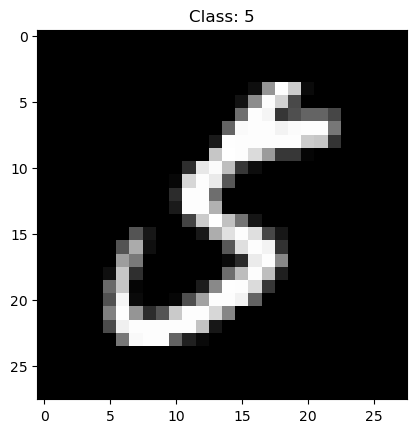

In [17]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title('Class: ' + str(digits_labels[index]));

<Axes: xlabel='labels', ylabel='count'>

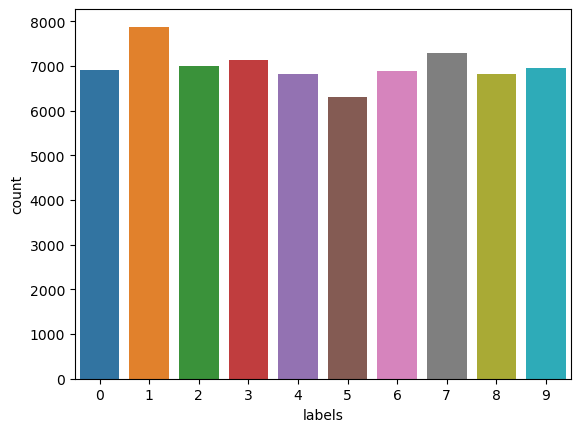

In [31]:
#sns.countplot(data=digits_labels)
df = pd.DataFrame({'labels': digits_labels})
sns.countplot(data=df, x='labels')

## Kaggle A-Z

In [32]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2023-06-05 12:44:19--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy... 162.159.134.42
Connecting to iaexpert.academy|162.159.134.42|:443... connected.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
Unable to establish SSL connection.


In [33]:
zip_object = zipfile.ZipFile(file = './alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [35]:
dataset_az = pd.read_csv('./A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
alphabet_data = dataset_az.drop('0', axis = 1)
alphabet_labels = dataset_az['0']

In [37]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [38]:
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [39]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [40]:
alphabet_data.shape

(372450, 28, 28)

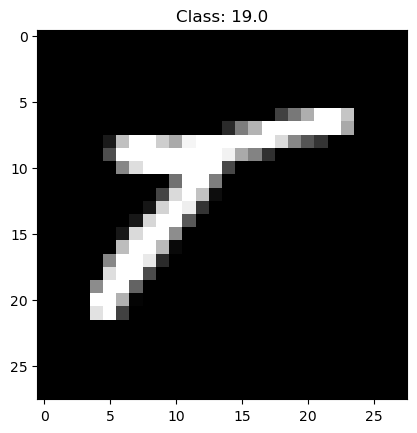

In [41]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='labels', ylabel='count'>

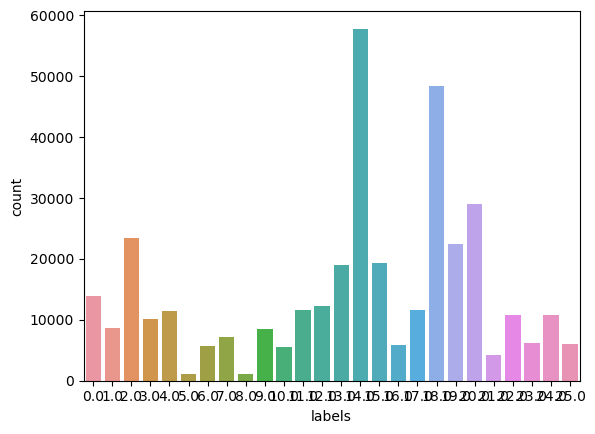

In [43]:
#sns.countplot(alphabet_labels)
df = pd.DataFrame({'labels': alphabet_labels})
sns.countplot(data=df, x='labels')

## Joining the datasets

In [44]:
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [45]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [46]:
alphabet_labels += 10

In [47]:
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [48]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [49]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [50]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [51]:
data = np.array(data, dtype = 'float32')

In [52]:
data = np.expand_dims(data, axis = -1)

In [53]:
data.shape

(442450, 28, 28, 1)

# Pre-processing the data

In [54]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [55]:
data /= 255.0

In [56]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [57]:
np.unique(labels), len(np.unique(labels)) # softmax

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

In [58]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [59]:
np.unique(labels)

array([0, 1])

In [60]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36)

In [62]:
labels[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

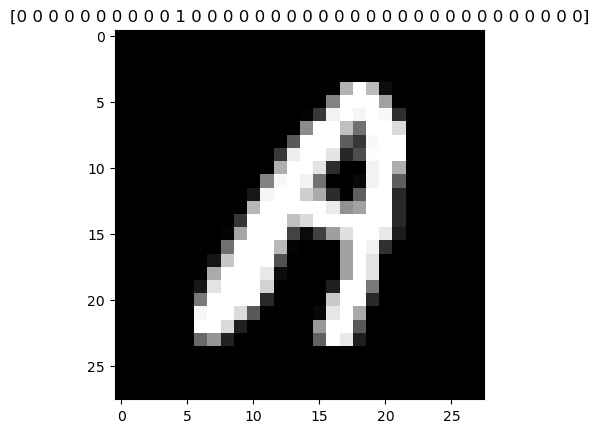

In [64]:
plt.imshow(data[0].reshape(28,28), cmap='gray')
plt.title(str(labels[0]));

In [65]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [66]:
classes_total.max()

57825

In [67]:
57825 / 6903

8.376792698826597

In [68]:
classes_weights = {}
for i in range(0, len(classes_total)):
    #print(i)
    classes_weights[i] = classes_total.max() / classes_total[i]

In [69]:
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=labels)

In [71]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [72]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
augmentation = ImageDataGenerator(rotation_range=10,
                                  zoom_range=0.05,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=False)

# Buiding the neural network

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [77]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [78]:
2 * 2 * 128

512

In [79]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [80]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [81]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the neural network

In [82]:
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [83]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [84]:
len(X_train) // batch_size

2765

In [85]:
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data=(X_test, y_test),
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=epochs,
                      class_weight=classes_weights,
                      verbose=1,
                      callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1958 - accuracy: 0.8239
Epoch 1: val_loss improved from inf to 0.23664, saving model to custom_ocr.model


INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 161s 58ms/step - loss: 2.1958 - accuracy: 0.8239 - val_loss: 0.2366 - val_accuracy: 0.9145
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9875 - accuracy: 0.9007
Epoch 2: val_loss improved from 0.23664 to 0.17923, saving model to custom_ocr.model


INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 199s 72ms/step - loss: 0.9875 - accuracy: 0.9007 - val_loss: 0.1792 - val_accuracy: 0.9378
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8072 - accuracy: 0.9135
Epoch 3: val_loss did not improve from 0.17923
2765/2765 [==============================] - 177s 64ms/step - loss: 0.8072 - accuracy: 0.9135 - val_loss: 0.2387 - val_accuracy: 0.8983
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7197 - accuracy: 0.9207
Epoch 4: val_loss did not improve from 0.17923
2765/2765 [==============================] - 187s 68ms/step - loss: 0.7197 - accuracy: 0.9207 - val_loss: 0.2133 - val_accuracy: 0.9190
Epoch 5/20
2765/2765 [==============================] - ETA: 0s - loss: 0.6571 - accuracy: 0.9260
Epoch 5: val_loss did not improve from 0.17923
2765/2765 [==============================] - 190s 69ms/step - loss: 0.6571 - accuracy: 0.9260 - val_loss: 0.2583 - val_accuracy: 0.8903
Epoch 6/20
2765/2765 

INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 186s 67ms/step - loss: 0.4348 - accuracy: 0.9461 - val_loss: 0.1681 - val_accuracy: 0.9406
Epoch 18/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.9473
Epoch 18: val_loss did not improve from 0.16805
2765/2765 [==============================] - 187s 67ms/step - loss: 0.4225 - accuracy: 0.9473 - val_loss: 0.2074 - val_accuracy: 0.9206
Epoch 19/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4202 - accuracy: 0.9483
Epoch 19: val_loss did not improve from 0.16805
2765/2765 [==============================] - 186s 67ms/step - loss: 0.4202 - accuracy: 0.9483 - val_loss: 0.1851 - val_accuracy: 0.9227
Epoch 20/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4100 - accuracy: 0.9476
Epoch 20: val_loss did not improve from 0.16805
2765/2765 [==============================] - 183s 66ms/step - loss: 0.4100 - accuracy: 0.9476 - val_loss: 0.1688 - val_accuracy: 0.9377


# Evaluating the neural network

In [86]:
X_test.shape

(88490, 28, 28, 1)

In [87]:
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 9s 13ms/step


In [88]:
predictions

array([[8.3417076e-01, 1.7217590e-06, 7.3189057e-07, ..., 1.8355152e-12,
        5.8161953e-07, 1.9873438e-08],
       [4.4128146e-18, 2.0635342e-12, 2.7063277e-14, ..., 3.5510708e-13,
        1.3237400e-10, 1.3601278e-12],
       [7.6128049e-20, 4.4951995e-21, 8.7663063e-18, ..., 3.0969254e-13,
        9.8587988e-14, 7.4541200e-20],
       ...,
       [3.5673299e-01, 1.7537027e-09, 5.4191766e-08, ..., 9.4483865e-20,
        6.2253429e-09, 1.8550210e-11],
       [1.4543257e-22, 1.6491551e-11, 4.9521893e-09, ..., 9.9929440e-01,
        1.0301603e-04, 4.1495344e-08],
       [1.5451182e-07, 6.2237372e-15, 5.7831707e-13, ..., 8.6213652e-18,
        1.6171030e-11, 1.8840427e-09]], dtype=float32)

In [89]:
predictions[0]

array([8.3417076e-01, 1.7217590e-06, 7.3189057e-07, 4.0036960e-07,
       3.4793791e-06, 2.9014545e-06, 1.5739068e-04, 4.5842995e-08,
       5.5637847e-05, 4.8200622e-05, 7.4865187e-07, 2.2302254e-05,
       3.4773737e-05, 5.0808873e-04, 1.8140491e-07, 6.2289908e-13,
       2.4701946e-04, 5.0445909e-10, 5.4402008e-12, 2.1746648e-06,
       1.3030896e-10, 8.6393115e-09, 3.6071839e-08, 8.4536614e-06,
       1.6275890e-01, 4.7204503e-05, 1.8250215e-03, 5.1608087e-08,
       5.1905868e-06, 1.1083352e-07, 9.7201024e-05, 2.9788800e-09,
       6.8944382e-07, 1.8355152e-12, 5.8161953e-07, 1.9873438e-08],
      dtype=float32)

In [90]:
len(predictions[0])

36

In [91]:
np.argmax(predictions[0])

0

In [92]:
name_labels[24]

'O'

In [93]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [94]:
np.argmax(y_test[0])

24

In [95]:
name_labels[np.argmax(y_test[0])]

'O'

In [96]:
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 17s 6ms/step - loss: 0.1688 - accuracy: 0.9377


[0.16879817843437195, 0.9376765489578247]

In [97]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.30      0.68      0.42      1381
           1       0.97      0.99      0.98      1575
           2       0.89      0.98      0.93      1398
           3       0.99      0.98      0.99      1428
           4       0.93      0.97      0.95      1365
           5       0.49      0.96      0.65      1263
           6       0.91      0.98      0.95      1375
           7       0.97      0.98      0.98      1459
           8       0.93      0.99      0.96      1365
           9       0.94      0.99      0.96      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.99      0.99      1734
           C       0.99      0.98      0.99      4682
           D       0.86      0.98      0.92      2027
           E       0.99      0.98      0.99      2288
           F       0.97      1.00      0.98       233
           G       0.96      0.93      0.95      1152
           H       0.98    

In [98]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

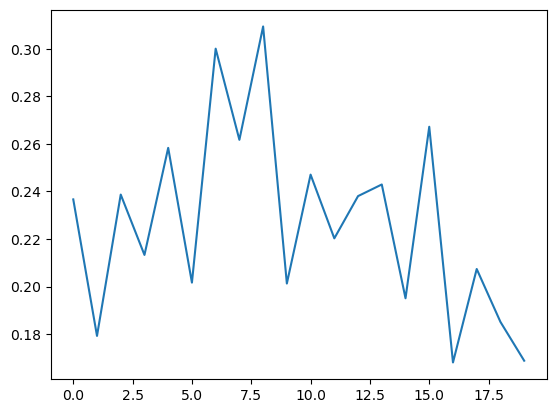

In [99]:
plt.plot(history.history['val_loss']);

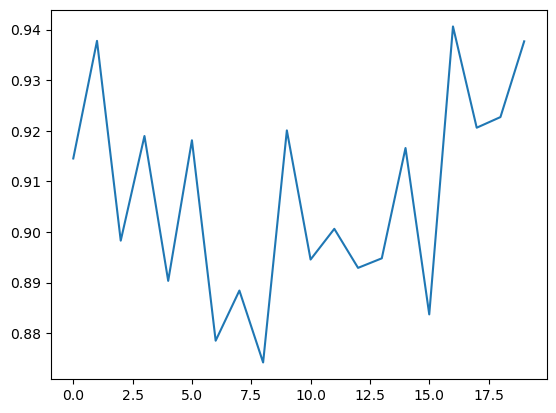

In [100]:
plt.plot(history.history['val_accuracy']);

# Saving the neural network on Google Drive

In [101]:
network.save('network', save_format= 'h5')

In [103]:
#from google.colab import drive
#drive.mount('/content/drive')

In [104]:
#!cp network /content/drive/MyDrive/Cursos\ -\ recursos/OCR\ with\ Python/Models/network

# Testing the neural network with images

In [106]:
from tensorflow.keras.models import load_model

In [107]:
#loaded_network = load_model('/content/drive/MyDrive/Cursos - recursos/OCR with Python/Models/network')
loaded_network = load_model('./network')

In [108]:
loaded_network

In [109]:
loaded_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

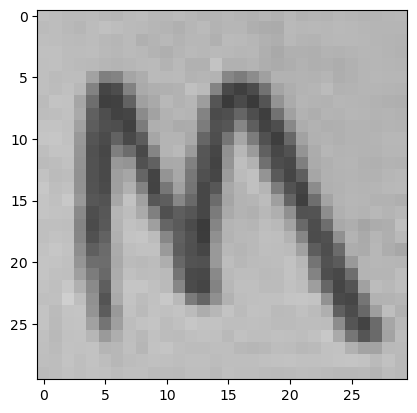

In [122]:
import cv2
#from google.colab.patches import cv2_imshow
img = cv2.imread(DATA_PATH+'Images/letter-m.jpg')
cv2_imshow(img)

In [123]:
img.shape

(30, 30, 3)

In [124]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

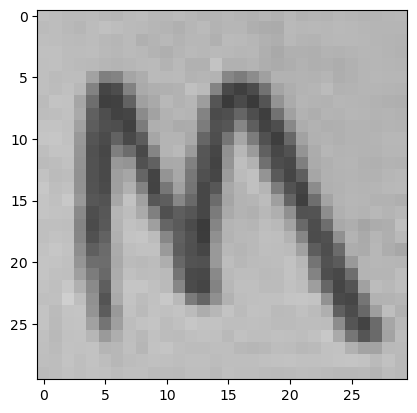

In [125]:
cv2_imshow(gray)

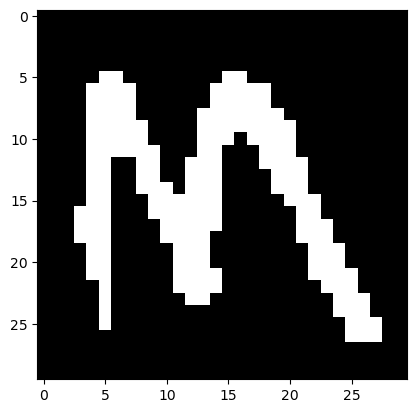

In [126]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [127]:
value

137.0

In [128]:
thresh.shape

(30, 30)

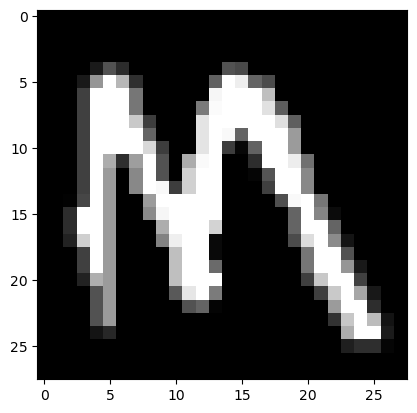

In [129]:
img = cv2.resize(thresh, (28,28))
cv2_imshow(img)

In [130]:
img.shape

(28, 28)

In [131]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [132]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [133]:
prediction = loaded_network.predict(img)
prediction

1/1 [==============================] - 0s 68ms/step


array([[2.1213654e-16, 7.5757759e-16, 3.0856150e-16, 2.7763612e-16,
        5.5142058e-11, 2.1651932e-18, 1.3522640e-17, 6.1206839e-13,
        1.5962368e-21, 2.4276909e-15, 1.5152907e-09, 6.6142980e-14,
        1.4201895e-12, 1.3773786e-10, 1.5999254e-13, 7.0728393e-21,
        7.2553611e-13, 1.0349229e-08, 4.7604236e-32, 4.1081855e-19,
        4.3681508e-10, 1.7184070e-15, 9.9988997e-01, 1.0982312e-04,
        4.2624668e-09, 9.1015455e-13, 8.2126781e-15, 1.4654689e-09,
        1.7117726e-08, 9.9749151e-09, 1.2258431e-08, 3.6608569e-27,
        8.6971447e-08, 6.3009686e-10, 2.3739244e-15, 3.6216118e-15]],
      dtype=float32)

In [134]:
np.argmax(prediction)

22

In [135]:
name_labels[22]

'M'